# Generate data synthetically

In [1]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=500,
    n_features=15,
    n_informative=3,
    n_redundant=2,
    n_repeated=0,
    n_classes=8,
    n_clusters_per_class=1,
    class_sep=0.8,
    random_state=0,
)

In [2]:
X.shape

(500, 15)

In [3]:
y.shape

(500,)

# Model training and Feature selection

In [7]:
from sklearn.feature_selection import RFECV

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np

In [8]:

min_features_to_select = 1

clf = LogisticRegression()
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1, # np. of fetures to eliminate at a time
    cv=cv,
    scoring="accuracy",
    min_features_to_select = min_features_to_select,
    n_jobs=-1

)

rfecv.fit(X, y)
print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 3


In [9]:
rfecv.ranking_

array([ 6,  8, 12,  1,  1,  7,  9, 11,  1,  5, 13, 10,  4,  3,  2])

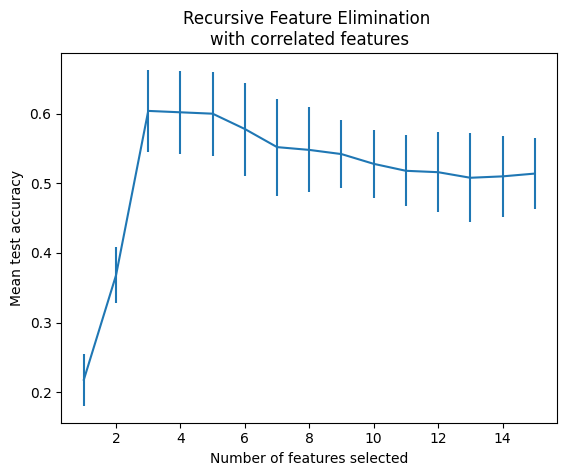

In [10]:
import matplotlib.pyplot as plt

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## SelectKBest Features

## Regression Feature Selection: (Numerical Input, Numerical Output)

This section demonstrates feature selection for a regression problem that as numerical inputs and numerical outputs.


In [15]:

# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# generate dataset
X, y = make_regression(n_samples=200, n_features=50, n_informative=10)

# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)

# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(200, 10)


In [16]:
X.shape

(200, 50)

In [17]:
X_selected 

array([[-1.0139474 ,  0.07178683,  0.42346199, ...,  0.42080923,
         1.10283488,  1.00867179],
       [-2.4052656 , -1.15844436,  0.23271519, ..., -0.92045586,
         0.13927023,  0.39971713],
       [-1.45995359, -0.93786776,  0.75425035, ...,  0.31431948,
        -0.85099945,  0.5843399 ],
       ...,
       [ 1.85962917, -1.42991897,  0.17809797, ..., -0.7441576 ,
        -1.20567216,  0.57593603],
       [-1.17092524,  1.07990583, -0.44455817, ...,  0.81024833,
        -1.78737891,  0.23552116],
       [ 0.44336842, -0.29815601,  0.73828321, ...,  0.57259645,
         0.13154642, -1.04707064]])